# House Price Prediction Model Using Decision Tree Regression

Essentially, the aim is to:

- Identify the variables affecting house prices, e.g., the area, the - number of rooms, bathrooms, etc. 
- Create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms; and
- Know the variables that significantly contribute towards predicting house prices.

### Data Preparation and Understanding

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings  
warnings.filterwarnings('ignore')

## Reading and Undrestanding the Data

In [225]:
df = pd.read_csv('housing.csv')

In [226]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [227]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [228]:
df.shape

(545, 13)

In [229]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [231]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [232]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Handling Categorical Variables

In [233]:
cat_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[cat_col] = df[cat_col].apply(lambda x : x.map({'yes':1,'no':0}))


In [234]:
df.furnishingstatus = df.furnishingstatus.map(
    {'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})


In [235]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [236]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [237]:
df.shape

(545, 13)

## Splitting data into train and test set

In [238]:
import sklearn 
from sklearn.model_selection import train_test_split

In [239]:
df_train,df_test = train_test_split(df , train_size=0.7,test_size=0.3,random_state=100)


In [240]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,3
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,2
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,1
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,1
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,3


In [241]:

df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,2
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,2
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,2
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,2
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,2


In [242]:
df_train.shape

(381, 13)

In [243]:
df_test.shape

(164, 13)

## Scaling the traget features using MinMaxScaler

In [244]:
from sklearn.preprocessing import MinMaxScaler

In [245]:
scaler = MinMaxScaler()
df_train[['price']] = scaler.fit_transform(df_train[['price']])
df_test[['price']] = scaler.transform(df_test[['price']])

In [246]:
# Creating X_train and y_train
y_train = df_train.pop('price')
X_train = df_train

In [247]:
# Creating X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [248]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,3600,3,1,1,1,0,0,0,0,1,0,3
19,6420,3,2,2,1,0,0,0,1,1,1,2
159,3150,3,2,1,1,1,1,0,1,0,0,1
35,7000,3,2,4,1,0,0,0,1,2,0,1
28,7950,5,2,2,1,0,1,1,0,2,0,3


In [249]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,2880,3,1,2,1,0,0,0,0,0,1,2
54,6000,3,2,2,1,1,0,0,1,1,0,2
171,10269,3,1,1,1,0,0,0,0,1,1,2
244,5320,3,1,2,1,1,1,0,0,0,1,2
268,4950,4,1,2,1,0,0,0,1,0,0,2


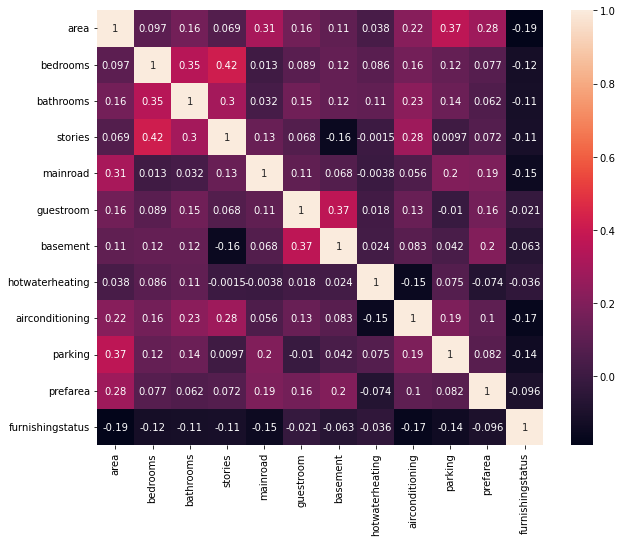

In [250]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building Using Random Forest Regression without Hyperparameter Tuning

In [251]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score 

In [252]:
rf = RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=5,min_samples_leaf=10)

In [253]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

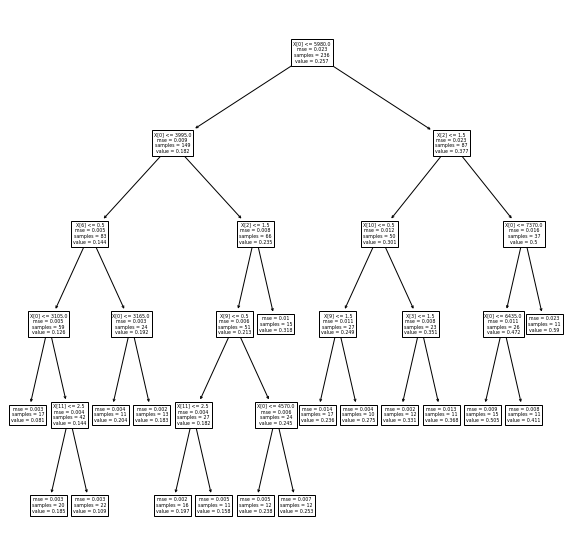

In [254]:
sample_tree = rf.estimators_[0]
plt.figure(figsize =(10,10))
sklearn.tree.plot_tree(sample_tree)
plt.show()

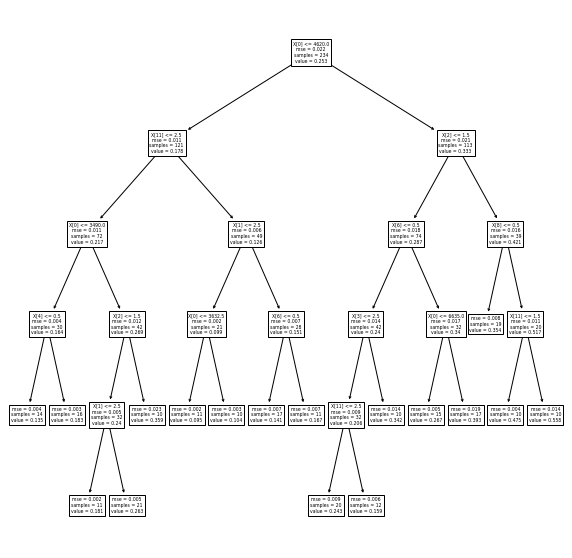

In [255]:
sample_tree = rf.estimators_[10]
plt.figure(figsize =(10,10))
sklearn.tree.plot_tree(sample_tree)
plt.show()

In [256]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [257]:
r2_score(y_train,y_train_pred)

0.6789649921951032

In [258]:
r2_score(y_test,y_test_pred)

0.5829032380957785

In [259]:
imp_df = pd.DataFrame({
    'x':X_train.columns,
    'imp':rf.feature_importances_
})
imp_df.sort_values(by='imp',ascending=False)

,x,imp
0,area,0.521393
2,bathrooms,0.267372
8,airconditioning,0.043098
11,furnishingstatus,0.042858
9,parking,0.032014
10,prefarea,0.023316
6,basement,0.023254
3,stories,0.018470
1,bedrooms,0.014167
5,guestroom,0.008175


## Model Building using Random Forest Regression with Hyperparameter Tuning

In [260]:
from sklearn.model_selection import GridSearchCV 

In [277]:
# creating hyperparameter grid 
params = {
    'max_depth':[1,2,4,5,6,7,8],
    'min_samples_leaf':[10,15,20,50],
    'max_features':[2,4,6,8],
    'n_estimators':[10,50,100,150,200]
    
}

In [278]:
rf_reg = RandomForestRegressor(n_jobs=-1,random_state=42,)

In [279]:
# Instantiating gridsearchCV
gridSearch = GridSearchCV(
    estimator=rf_reg,
    param_grid=params, 
    n_jobs=-1,
    cv=4 , 
    scoring='r2',
    verbose=True,  
)

In [280]:
gridSearch.fit(X_train,y_train)

Fitting 4 folds for each of 560 candidates, totalling 2240 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 5, 6, 7, 8],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': [10, 15, 20, 50],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='r2', verbose=True)

In [286]:
sample_tree  =  gridSearch.best_estimator_[0]
sample_tree

DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_leaf=10,
                      random_state=1608637542)

In [287]:
gridSearch.best_score_

0.5891650162665489

In [290]:
res = pd.DataFrame(gridSearch.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037534,0.011790,0.010009,0.002451,1,2,10,10,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.348308,0.282366,0.336295,0.269953,0.309231,0.033630,510
1,0.084578,0.008854,0.013262,0.000434,1,2,10,50,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.336019,0.354303,0.323849,0.256377,0.317637,0.036992,505
2,0.147634,0.002294,0.017516,0.001120,1,2,10,100,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.326753,0.352087,0.315768,0.249456,0.311016,0.037903,509
3,0.203935,0.010789,0.025273,0.001300,1,2,10,150,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.315146,0.352731,0.312447,0.246124,0.306612,0.038382,518
4,0.270745,0.004979,0.026274,0.000433,1,2,10,200,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.310637,0.356519,0.315562,0.250026,0.308186,0.038010,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.030778,0.005122,0.011010,0.001873,8,8,50,10,"{'max_depth': 8, 'max_features': 8, 'min_sampl...",0.434579,0.403468,0.409272,0.269879,0.379300,0.064248,409
556,0.079322,0.009610,0.014513,0.002293,8,8,50,50,"{'max_depth': 8, 'max_features': 8, 'min_sampl...",0.439800,0.462211,0.410465,0.285833,0.399577,0.068186,382
557,0.138375,0.003348,0.016765,0.000830,8,8,50,100,"{'max_depth': 8, 'max_features': 8, 'min_sampl...",0.437569,0.469484,0.412802,0.295400,0.403814,0.065739,365
558,0.213944,0.018610,0.019518,0.001119,8,8,50,150,"{'max_depth': 8, 'max_features': 8, 'min_sampl...",0.435949,0.463047,0.411591,0.291844,0.400608,0.065380,367


In [292]:
res.sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
441,0.071815,0.004820,0.016265,0.004327,7,6,10,50,"{'max_depth': 7, 'max_features': 6, 'min_sampl...",0.627320,0.613968,0.623144,0.492229,0.589165,0.056174,1
521,0.074067,0.004954,0.013012,0.001001,8,6,10,50,"{'max_depth': 8, 'max_features': 6, 'min_sampl...",0.628100,0.612422,0.623144,0.492229,0.588974,0.056142,2
361,0.078071,0.005344,0.015514,0.002294,6,6,10,50,"{'max_depth': 6, 'max_features': 6, 'min_sampl...",0.630419,0.607872,0.619666,0.492710,0.587667,0.055400,3
443,0.218448,0.004149,0.035282,0.017938,7,6,10,150,"{'max_depth': 7, 'max_features': 6, 'min_sampl...",0.624631,0.609320,0.616279,0.499578,0.587452,0.051023,4
284,0.281505,0.019478,0.033531,0.003844,5,6,10,200,"{'max_depth': 5, 'max_features': 6, 'min_sampl...",0.627010,0.608702,0.615766,0.498238,0.587429,0.051907,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.020519,0.002064,0.007507,0.000500,7,2,50,10,"{'max_depth': 7, 'max_features': 2, 'min_sampl...",0.278920,0.128851,0.231951,0.139655,0.194844,0.062942,555
495,0.021770,0.002387,0.008258,0.000830,8,2,50,10,"{'max_depth': 8, 'max_features': 2, 'min_sampl...",0.278920,0.128851,0.231951,0.139655,0.194844,0.062942,557
255,0.022270,0.001922,0.008758,0.001481,5,2,50,10,"{'max_depth': 5, 'max_features': 2, 'min_sampl...",0.278920,0.128851,0.231951,0.139655,0.194844,0.062942,557
335,0.022770,0.003034,0.009508,0.002695,6,2,50,10,"{'max_depth': 6, 'max_features': 2, 'min_sampl...",0.278920,0.128851,0.231951,0.139655,0.194844,0.062942,559
